In [10]:
# Imports 
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from argparse import ArgumentParser
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [14]:
# For plotting the graph
def plotpdDataFrame(N, df):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(df['Time'], df['Susceptible'], linewidth=2)
    ax.plot(df['Time'], df['Infected'], linewidth=2)
    ax.plot(df['Time'], df['Recovered'], linewidth=2)
    ax.set_title(f'Plot of SIR in Network for with {N} nodes')
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.legend(['Susceptible', 'Infected', 'Recovered'])
    plt.savefig(f'Q-1.3.4_SIRNetworkPlot_for_{N}_nodes.png')

In [15]:
# Parse the file 
def edgeExtract(file):
  edges = []
  with open(file, "r") as f:
    for line in f:
      line = line.strip()
      line = line.split(" ")
      edges.append((int(line[0]),int(line[2])))
  return edges

# Edge creator from the nodes 
def edgesFromNodes(N):
  edges = []
  for i in range(2, N+1):
    for j in range(1, i):
      edges.append((i, j))
  return edges

# SIR Network Model
def SIRNetwork(N, bd, ir, maxTime):
    b, d = bd
    G = nx.from_edgelist(edgesFromNodes(N))
    i0, r0 = ir
    s0 = 1 -i0 -r0
    dfs = []
    for iter in tqdm(range(0,50)):
        # print(f"Iteration: {iter}")
        data = pd.DataFrame({'Time':[], 'Susceptible':[], 'Infected':[], 'Recovered':[]})
        times = range(0, 146)
        # Nodes which are infected
        susceptible = []
        infected = []
        recovered = []
        # Nodes which recovered 
        t = 0
        tmax_running = 0
        generation = 0
        # Total pop set
        Npop = np.arange(1, N, 1)
        infected = random.sample(set(Npop), round(N*i0))
        if r0 == 0:
            susceptible = set(Npop) - set(infected)
            recovered = set()
        else:
            recovered  = random.sample(set(Npop) - set(infected), round(N*r0))
            susceptible = set(Npop) - set(recovered) - set(infected)

        for t in times:
            # At each time all the susceptible nodes sample a random neighbor 
            new_infected = set()
            for node in susceptible:
                neighbors = G.neighbors(node)
                # Check for infected neighbors 
                sampledNeighbor = random.sample(set(neighbors),1)
                if len(set(sampledNeighbor).intersection(set(infected))):
                    if random.random() < b:
                        new_infected.add(node)
            susceptible = set(susceptible) - set(new_infected)
            infected = set(infected).union(set(new_infected))
            try:
                new_recovered = random.sample(infected, round(d*len(infected)))
            except ValueError:
                new_recovered = set()
            recovered = set(recovered).union(set(new_recovered))
            infected = set(infected) - set(new_recovered)
            data.loc[len(data.index)] = [t, len(susceptible)/N, len(infected)/N, len(recovered)/N]
        dfs.append(data)

    averages = pd.concat([each.stack() for each in dfs],axis=1)\
                .apply(lambda x:x.mean(),axis=1)\
                .unstack()
    plotpdDataFrame(N, averages)
    return averages
    


100%|██████████| 50/50 [01:02<00:00,  1.24s/it]


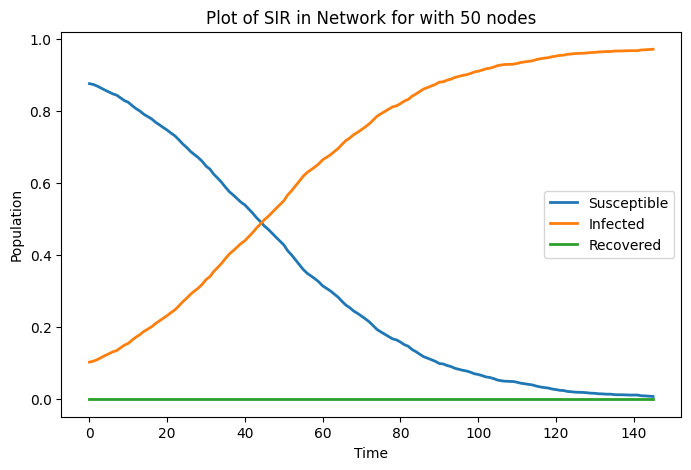

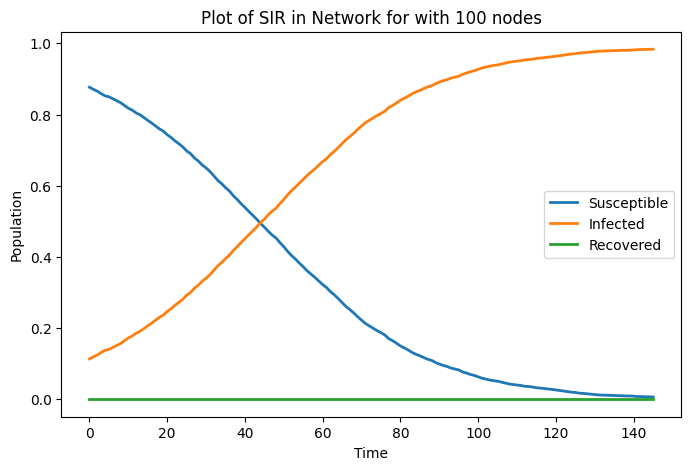

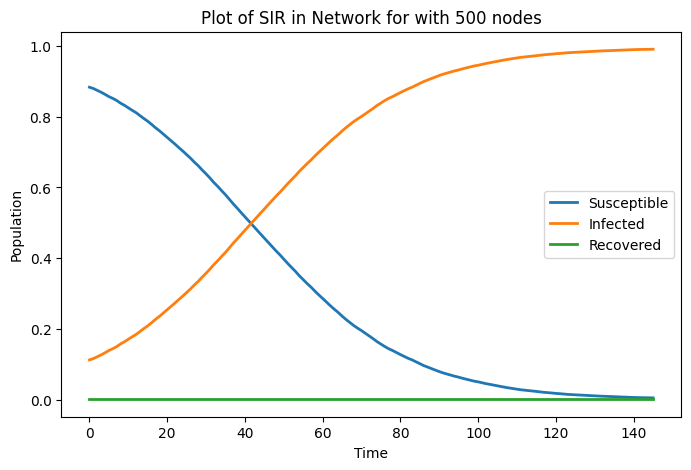

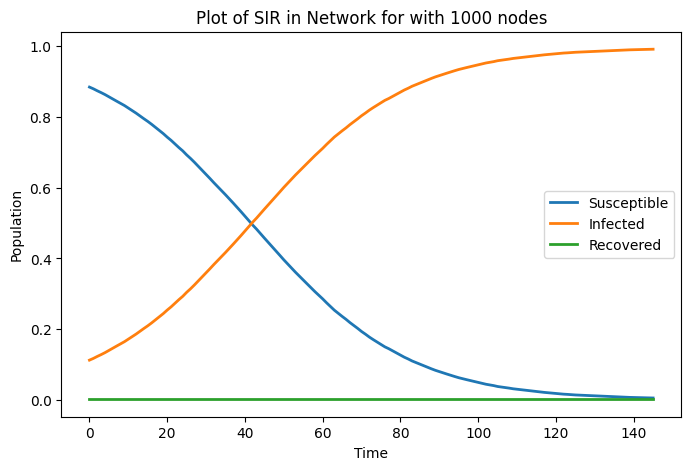

In [16]:
# Parameters

params = (4.96624755e-02, 9.12774621e-06)
inits = (0.10798003802281368,0.0020386203150461707)
dfs = [SIRNetwork(N, params, inits, 900) for N in [50, 100, 500, 1000]]
